In [1]:
#Import the required lib

import pandas as pd
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt

In [2]:
#path for the data
path = "../2nd_test_all"

In [3]:
#To make file readable make them as .txt
for filename in glob.glob(os.path.join(path, '*.39')):
    base = os.path.splitext(filename)[0]
    os.rename(filename, base + ".txt")
    print(filename)

In [4]:
# function to calculate rms and kurtosis using required variables 
rms_1 = []
rms_2 = []
rms_3 = []
rms_4 = []
kurtosis_1 = []
kurtosis_2 = []
kurtosis_3 = []
kurtosis_4 = []

def rms_kurtosis(path):
    d = np.loadtxt(path, delimiter="\t")
    
    mean_col1 = np.mean(d[0:,0])
    mean_col2 = np.mean(d[0:,1])
    mean_col3 = np.mean(d[0:,2])
    mean_col4 = np.mean(d[0:,3])
    
    std_col1 = np.sqrt(np.sum(np.power((d[0:,0]-mean_col1),2))/len(d[0:,0]))
    std_col2 = np.sqrt(np.sum(np.power((d[0:,1]-mean_col2),2))/len(d[0:,1]))
    std_col3 = np.sqrt(np.sum(np.power((d[0:,2]-mean_col3),2))/len(d[0:,2]))
    std_col4 = np.sqrt(np.sum(np.power((d[0:,3]-mean_col4),2))/len(d[0:,3]))

    rms_numerator_1 = np.sum(d[0:,0]**2)
    rms_term_1 = rms_numerator_1/len(d)
    rms_term_1 = np.power(rms_term_1,.5)
    rms_1.append(rms_term_1)
    
    rms_numerator_2 = np.sum(d[0:,1]**2)
    rms_term_2 = rms_numerator_2/len(d)
    rms_term_2 = np.power(rms_term_2,.5)
    rms_2.append(rms_term_2)

    rms_numerator_3 = np.sum(d[0:,2]**2)
    rms_term_3 = rms_numerator_3/len(d)
    rms_term_3 = np.power(rms_term_3,.5)
    rms_3.append(rms_term_3)    

    rms_numerator_4 = np.sum(d[0:,3]**2)
    rms_term_4 = rms_numerator_4/len(d)
    rms_term_4 = np.power(rms_term_4,.5)
    rms_4.append(rms_term_4)
    
    kurtosis_numerator_1 = np.sum((d[0:,0]-mean_col1)**4)
    kurtosis_denominator_1 = (len(d)-1)*np.power(std_col1,4)
    kurtosis_term_1 = kurtosis_numerator_1/kurtosis_denominator_1
    kurtosis_1.append(kurtosis_term_1)
    
    kurtosis_numerator_2 = np.sum((d[0:,1]-mean_col2)**4)
    kurtosis_denominator_2 = (len(d)-1)*np.power(std_col2,4)
    kurtosis_term_2 = kurtosis_numerator_2/kurtosis_denominator_2
    kurtosis_2.append(kurtosis_term_2)
    
    kurtosis_numerator_3 = np.sum((d[0:,2]-mean_col3)**4)
    kurtosis_denominator_3 = (len(d)-1)*np.power(std_col3,4)
    kurtosis_term_3 = kurtosis_numerator_3/kurtosis_denominator_3
    kurtosis_3.append(kurtosis_term_3)
    
    kurtosis_numerator_4 = np.sum((d[0:,3]-mean_col1)**4)
    kurtosis_denominator_4 = (len(d)-1)*np.power(std_col4,4)
    kurtosis_term_4 = kurtosis_numerator_4/kurtosis_denominator_4
    kurtosis_4.append(kurtosis_term_4)

In [5]:
#Calculate all the values corresponding to the each data file

os.chdir("../2nd_test_all")
for file in glob.glob("*.txt"):
    rms_kurtosis(file)

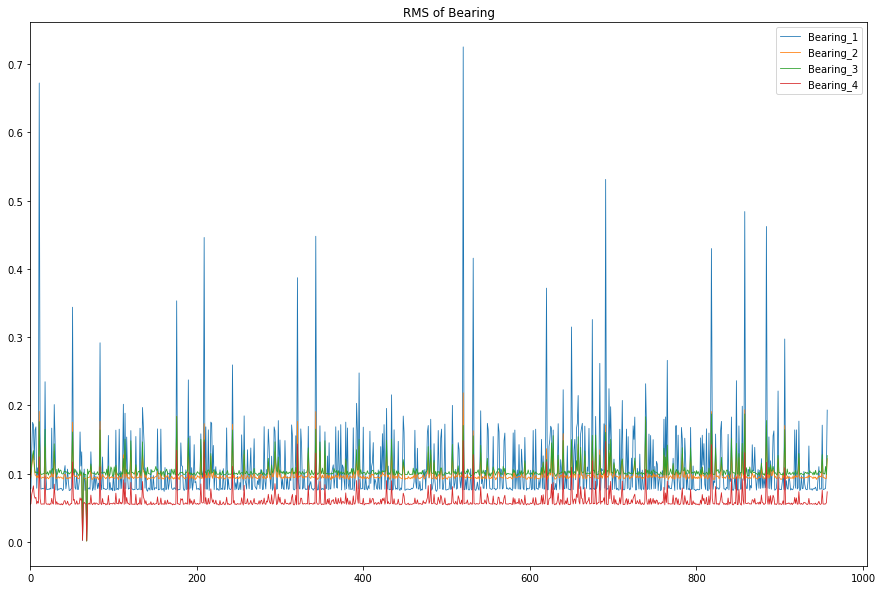

In [26]:
#RMS

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
line = plt.plot(rms_1,linewidth=.8,label ="Bearing_1")
line = plt.plot(rms_2,linewidth=0.8, label="Bearing_2")
line = plt.plot(rms_3,linewidth=0.8, label="Bearing_3")
line = plt.plot(rms_4,linewidth=0.8, label="Bearing_4")
plt.xlim(xmin=0)
plt.legend()
plt.title('RMS of Bearing')
plt.show()

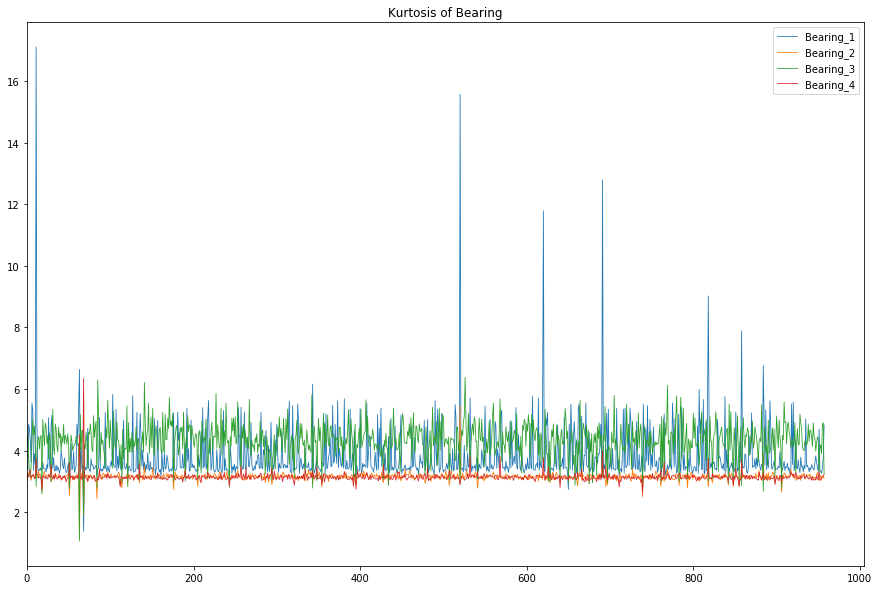

In [18]:
##  Kurtosis of Bearing

fig = plt.figure(figsize=(15,10))
line = plt.plot(kurtosis_1,linewidth=0.8, label="Bearing_1")
line = plt.plot(kurtosis_2,linewidth=0.8, label="Bearing_2")
line = plt.plot(kurtosis_3,linewidth=0.8, label="Bearing_3")
line = plt.plot(kurtosis_4,linewidth=0.8, label="Bearing_4")
plt.xlim(xmin=0)
plt.legend()
plt.title('Kurtosis of Bearing')
plt.show()

In [8]:
from scipy.stats import weibull_min
shape_rms1, loc_rms1, scale_rms1 = weibull_min.fit(rms_1)
shape_rms2, loc_rms2, scale_rms2 = weibull_min.fit(rms_2)
shape_rms3, loc_rms3, scale_rms3 = weibull_min.fit(rms_3)
shape_rms4, loc_rms4, scale_rms4 = weibull_min.fit(rms_4)

print("    B-1          B-2             B-3           B-4")
print("   SHAPE1       SHAPE2         SHAPE3        SHAPE4")
print(shape_rms1,  shape_rms2,  shape_rms3, shape_rms4)
print("   SCALE1       SCALE2         SCALE3        SCALE4")
print(scale_rms1,   scale_rms2, scale_rms3,   scale_rms4)

    B-1          B-2             B-3           B-4
   SHAPE1       SHAPE2         SHAPE3        SHAPE4
1.9160780328224578 4.918553866138657 5.883790836317803 3.7885122060500693
   SCALE1       SCALE2         SCALE3        SCALE4
0.11926169062903436 0.10649058285978567 0.11382151954484442 0.06437632207354754


In [9]:
from scipy.stats import weibull_max
shape_rms1, loc_rms1, scale_rms1 = weibull_max.fit(rms_1)
webl = weibull_min.cdf(rms_1,c=0,loc=0,scale=1)
shape_rms2, loc_rms2, scale_rms2 = weibull_max.fit(rms_2)
shape_rms3, loc_rms3, scale_rms3 = weibull_max.fit(rms_3)
shape_rms4, loc_rms4, scale_rms4 = weibull_max.fit(rms_4)

print("   SHAPE1       SHAPE2         SHAPE3        SHAPE4")
print(shape_rms1,  shape_rms2,  shape_rms3, shape_rms4)
print("   SCALE1       SCALE2         SCALE3        SCALE4")
print(scale_rms1,   scale_rms2, scale_rms3,   scale_rms4)

   SHAPE1       SHAPE2         SHAPE3        SHAPE4
1256587875.3921878 8.315862147569984 6.150511655886298 12.194459466967293
   SCALE1       SCALE2         SCALE3        SCALE4
71575628.93570876 0.13473401314896954 0.09723034945555262 0.13231470443640247


In [10]:
from scipy.stats import exponweib
from scipy.optimize import fmin

# x is the data array
# returns [shape, scale]

def fitweibull(x):
    def optfun(theta):
        return -np.sum(np.log(exponweib.pdf(x, 1, theta[0], scale = theta[1], loc = 0)))
    logx = np.log(x)
    shape = 1.2 / np.std(logx)
    scale = np.exp(np.mean(logx) + (0.572 / shape))
    return fmin(optfun, [shape, scale], xtol = 0.01, ftol = 0.01, disp = 0)

In [11]:
fitweibull(rms_1[0:2])

/home/raghuvar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([3.25529750e+02, 7.79462223e-02])